In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model, model_from_yaml


In [19]:
scaler = joblib.load("scaler.save") 


In [20]:
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")

In [21]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [91]:
train = pd.read_csv("train.csv")

In [92]:
train_ = train.iloc[:, 1:2].values

In [93]:
train_.shape

(3273, 1)

In [94]:
train_ = train_[-60:,]

In [95]:
#train_.shape
train_ = scaler.transform(train_)

In [96]:
train_.shape

(60, 1)

In [97]:
pred = []
for i in range(120):
    train1 = train_.reshape(1,train_.shape[0],train_.shape[1])
    p = loaded_model.predict(train1)
    pred.append(p)
    train_=np.append(train_[1:],np.array(p).reshape(-1,1),axis=0)
    

In [98]:
test= pd.read_csv('test.csv')

In [99]:
test_ = test.iloc[:, 1:2].values

In [100]:
pred = np.array(pred).reshape(-1,1)

In [101]:
pred.shape

(120, 1)

In [102]:
predictions=scaler.inverse_transform(pred)

In [103]:
t=test_[:120]

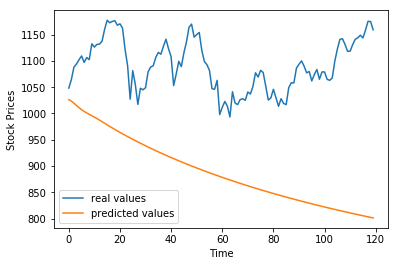

In [105]:
plt.plot(t, label = 'real values')
plt.plot(predictions, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()